In [40]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [24]:
# Data loading
file_path = Path("myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


## Prepare the Data

In [25]:
# Remove the MYOPIC Column
df_myopia_update = df_myopia.drop(columns=["MYOPIC"])
df_myopia_update.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [26]:
# Find null values
for column in df_myopia_update.columns:
    print(f"Column {column} has {df_myopia_update[column].isnull().sum()} null values")


Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [27]:
# Find duplicate entries
print(f"Duplicate entries: {df_myopia_update.duplicated().sum()}")


Duplicate entries: 0


In [28]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_myopia_update)
scaled_data[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

In [29]:
#Identify the number of rows and columns in the scaled data
scaled_data.shape

(618, 14)

In [31]:
# Fetch the explained variance
pca.explained_variance_.sum()

14.022675010981638

## Dimensionality Reduction

In [32]:
#PCA reduction at 99%
pca = PCA(n_components = 0.99)
components = pca.fit_transform(scaled_data)

In [33]:
# Fetch the explained variance
pca.explained_variance_.sum()

14.022675010981638

In [34]:
#PCA reduction at 90%
pca = PCA(n_components = 0.90)
components = pca.fit_transform(scaled_data)

In [35]:
# Fetch the explained variance
pca.explained_variance_.sum()

12.883152909825315

How did the number of features change? Features reduced when using 99% to 90% of the explained variance.

In [37]:
# Initialize t-SNE model
tsne_myopia = TSNE(perplexity = 50)

In [42]:
# Reduce dimensions
tsne_features = tsne_myopia.fit_transform(components)
tsne_features.shape

(618, 2)

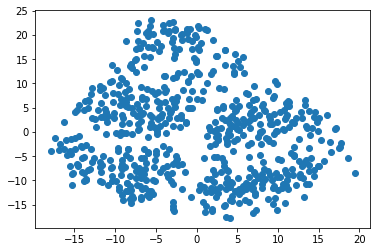

In [46]:
# Prepare to plot the dataset

# The first column of transformed features
x = tsne_features[:,0]

# The second column of transformed features
y = tsne_features[:,1]

#visualize the clusters
plt.scatter(x, y)
plt.show()

Are there distinct clusters? No, there are not distinct clusters in the scatter plot.

## Cluster Analysis with K-means

In [47]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(components)
    inertia.append(km.inertia_)

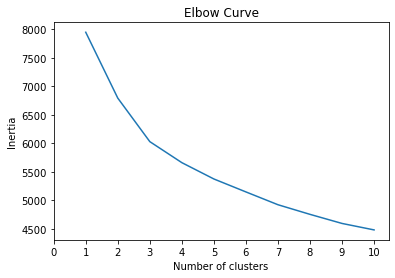

In [48]:
# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Recommendation

While there isn't a strong elbow that can be seen in the plot above, there is a small bend at 3 clusters. Due to this, I would recommend that the patients be clustered into 3 groups.